What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [41]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
import seaborn as sns 
%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("MasterCapStoneFile_01.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
Note: you may need to restart the kernel to use updated

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~-=py.libs\\libopenblas-802f9ed1179cb9c9b03d67ff79f48187.dll'
Consider using the `--user` option or check the permissions.



In [42]:
df.head().T

,0,1,2,3,4
HD_M_Value,4.200000,4.700000,5.800000,4.400000,4.000000
HD_M_US,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,-0.343750,-0.265625,-0.093750,-0.312500,-0.375000
HBP_M_Value,32.300000,28.300000,33.800000,27.400000,33.000000
HBP_M_US,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,-0.003086,-0.126543,0.043210,-0.154321,0.018519
HC_M_Value,34.100000,21.800000,36.700000,27.100000,35.000000
HC_M_US,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,0.000000,-0.360704,0.076246,-0.205279,0.026393
OB_M_Value,30.300000,30.600000,17.300000,22.100000,25.700000


In [43]:
#df.info
#df.head()
#df
#df.columns
#df.describe()
#df.isna().sum()
#df.shape 

In [44]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

Index:   RangeIndex(start=0, stop=27210, step=1)
Columns: Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')
Size:    435360
Shape:   (27210, 16)


,count,mean,std,min,25%,50%,75%,max
HD_M_Value,27210.0,5.602977,2.118858e+00,0.300000,4.200000,5.300000,6.700000,35.800000
HD_M_US,27210.0,6.400000,3.244575e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,27210.0,-0.124535,3.310716e-01,-0.953125,-0.343750,-0.171875,0.046875,4.593750
HBP_M_Value,27210.0,30.653208,8.260472e+00,5.300000,25.300000,29.500000,34.900000,70.300000
HBP_M_US,27210.0,32.400000,1.514194e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,27210.0,-0.053913,2.549528e-01,-0.836420,-0.219136,-0.089506,0.077160,1.169753
HC_M_Value,27210.0,31.364296,4.887047e+00,6.900000,28.800000,31.700000,34.400000,55.400000
HC_M_US,27210.0,34.100000,1.554696e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,27210.0,-0.080226,1.433152e-01,-0.797654,-0.155425,-0.070381,0.008798,0.624633
OB_M_Value,27210.0,30.472922,8.180685e+00,9.600000,24.500000,29.500000,35.600000,58.600000


In [45]:
# Total number for all the factors by cities

#OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [46]:
#df.describe().T
df["Target_Value"].describe()

count    27210.000000
mean         3.211466
std          1.449541
min          0.300000
25%          2.300000
50%          2.900000
75%          3.800000
max         19.500000
Name: Target_Value, dtype: float64

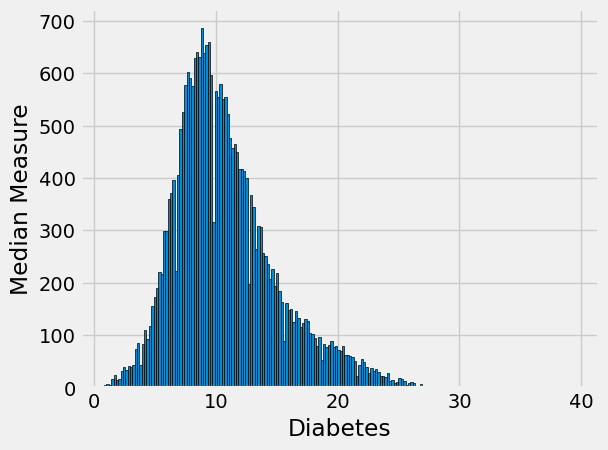

In [47]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses, bins=200,  edgecolor='black')
plt.show()

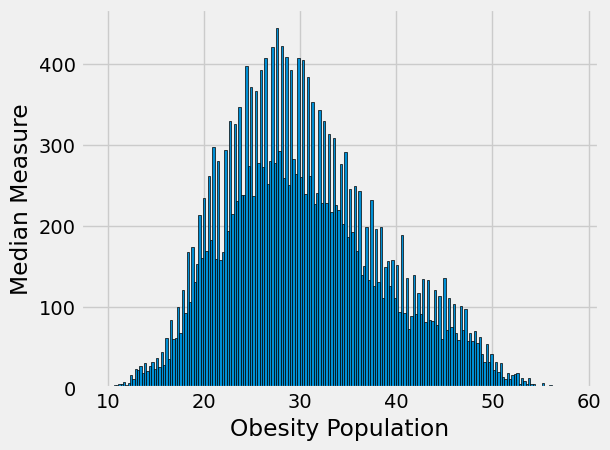

In [48]:
#plt.title('Population by cities')
plt.xlabel('Obesity Population')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures, bins=200,  edgecolor='black')
plt.show()

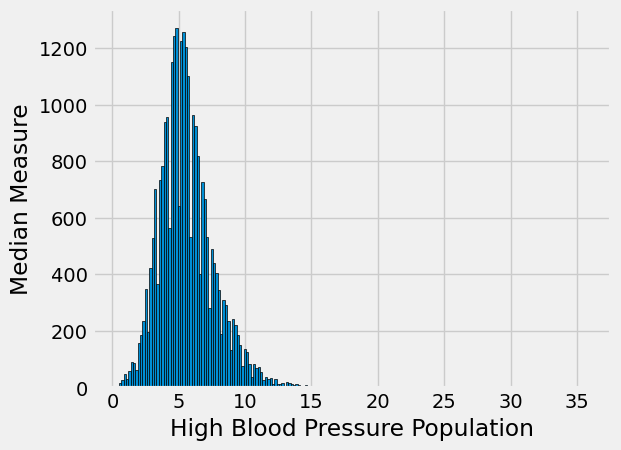

In [49]:
#plt.title('Population by cities')
plt.xlabel('High Blood Pressure Population')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures, bins=200,  edgecolor='black')
plt.show()

In [50]:
## Dividing the dataset into independent and dependent features.
X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

#X

ML Analysis - LinearRegression Model

In [51]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#80% training - it chooses ramdom samples.
len(X_train)
#20% or what ever % specified.
len(X_test)

X_train

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US
19424,5.9,6.4,-0.078125,34.0,32.4,0.049383,37.6,34.1,0.102639,49.4,30.1,0.641196,8.4,10.8,-0.222222
14910,5.5,6.4,-0.140625,22.1,32.4,-0.317901,27.2,34.1,-0.202346,30.5,30.1,0.013289,15.1,10.8,0.398148
7943,9.0,6.4,0.406250,33.8,32.4,0.043210,29.8,34.1,-0.126100,19.6,30.1,-0.348837,8.3,10.8,-0.231481
18487,5.2,6.4,-0.187500,19.2,32.4,-0.407407,33.0,34.1,-0.032258,31.6,30.1,0.049834,11.5,10.8,0.064815
26568,3.5,6.4,-0.453125,27.4,32.4,-0.154321,32.2,34.1,-0.055718,25.0,30.1,-0.169435,10.6,10.8,-0.018519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24205,6.0,6.4,-0.062500,42.1,32.4,0.299383,26.7,34.1,-0.217009,46.4,30.1,0.541528,8.9,10.8,-0.175926
14171,4.4,6.4,-0.312500,30.4,32.4,-0.061728,19.8,34.1,-0.419355,46.1,30.1,0.531561,10.9,10.8,0.009259
22416,6.7,6.4,0.046875,54.6,32.4,0.685185,22.9,34.1,-0.328446,30.4,30.1,0.009967,9.5,10.8,-0.120370
12956,7.4,6.4,0.156250,31.2,32.4,-0.037037,31.7,34.1,-0.070381,40.0,30.1,0.328904,12.6,10.8,0.166667


ML Analyzing using - Linear Regression Model.

In [53]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [54]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test

print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error

# The mean of the absolute error - this is mean of the residuat error of the test.

r2:-34.667290398951934  
mae:1.053554974177093  
-34.667290398951934
1.053554974177093
0.32610584543802407


ML Analyzing using - Decision Tree Model.

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.5614261220808314
r2:-0.8228659500277946  
mae:1.5718118338846012  
-0.8228659500277946
1.5718118338846012


#### ML Analyzing using - RandomForestRegressor Model.

In [56]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)

mean_absolute_percentage_error(y_pred,y_test)
print("r2:{} ".format(r2_score(y_pred,y_test)))
print("mae:{} ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))


r2:-9.932187458614822 
mae:1.1005270121278943 
-9.932187458614822
1.1005270121278943
